In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel('clean.xlsx')

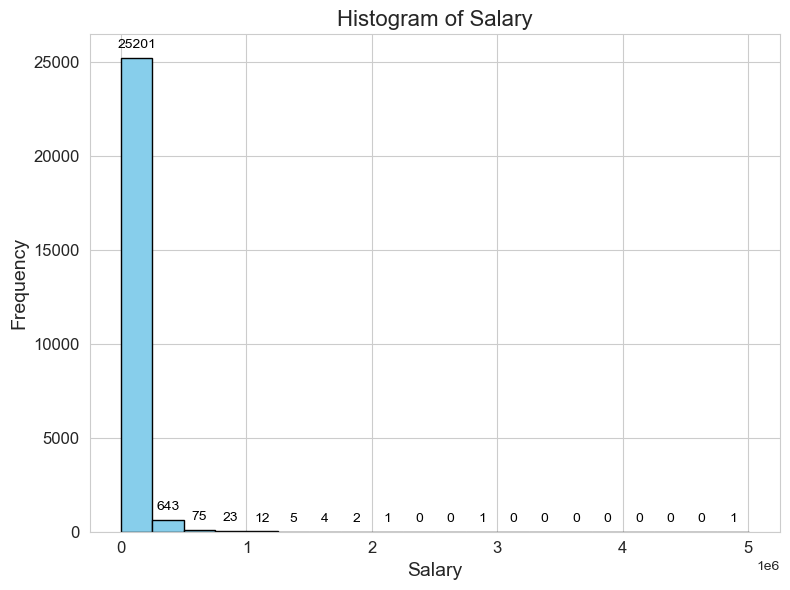

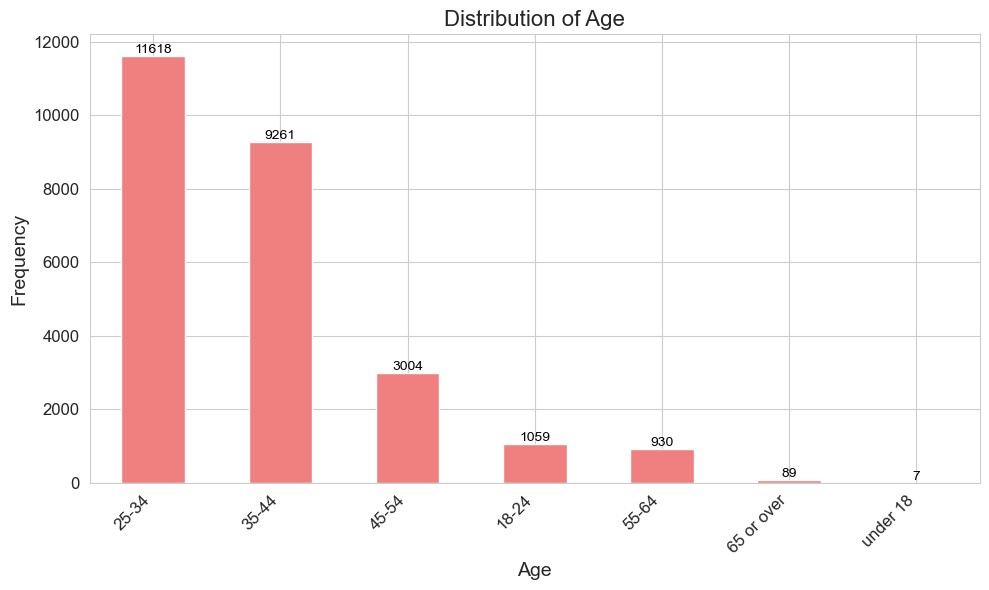

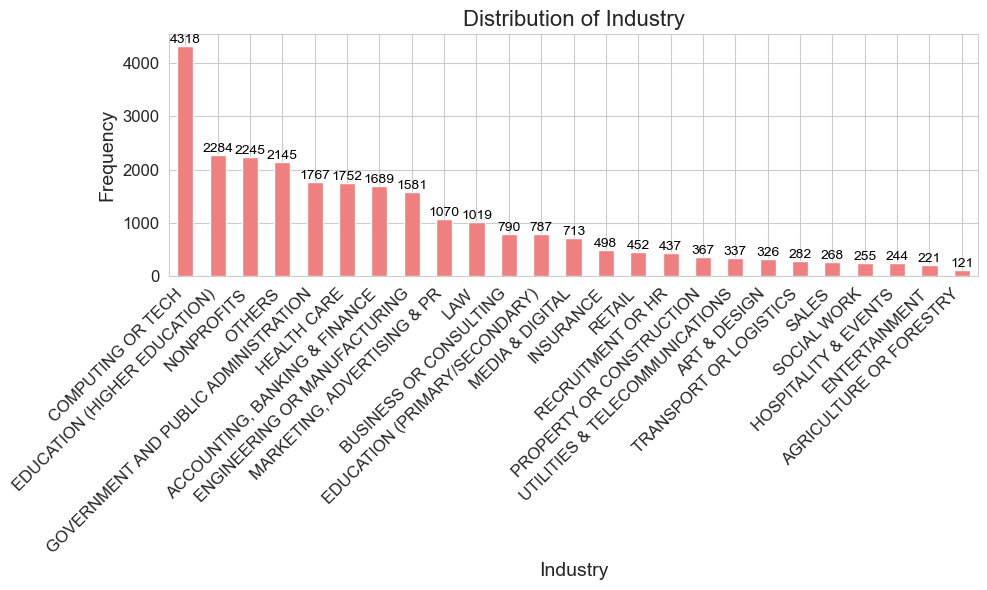

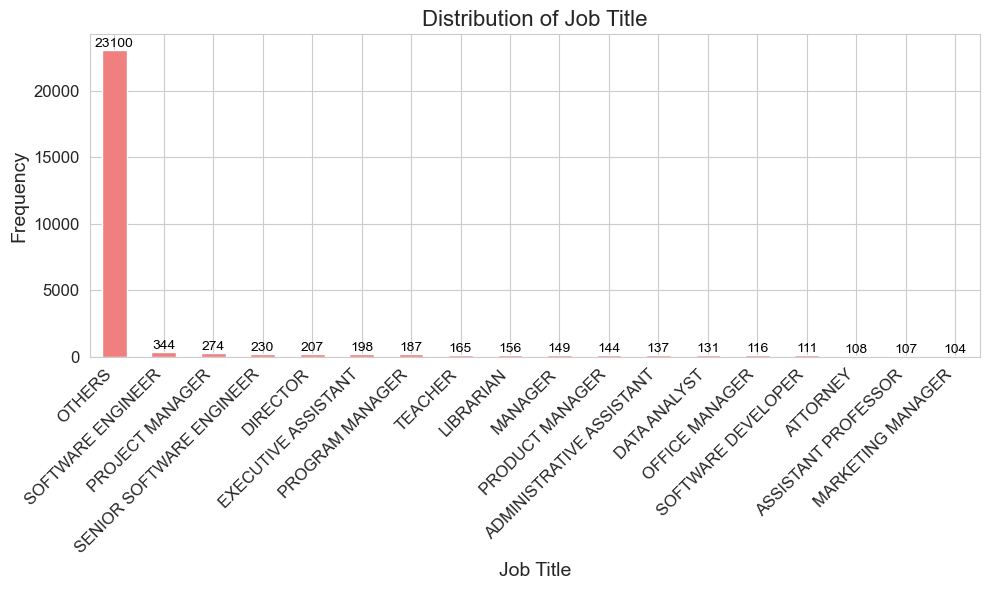

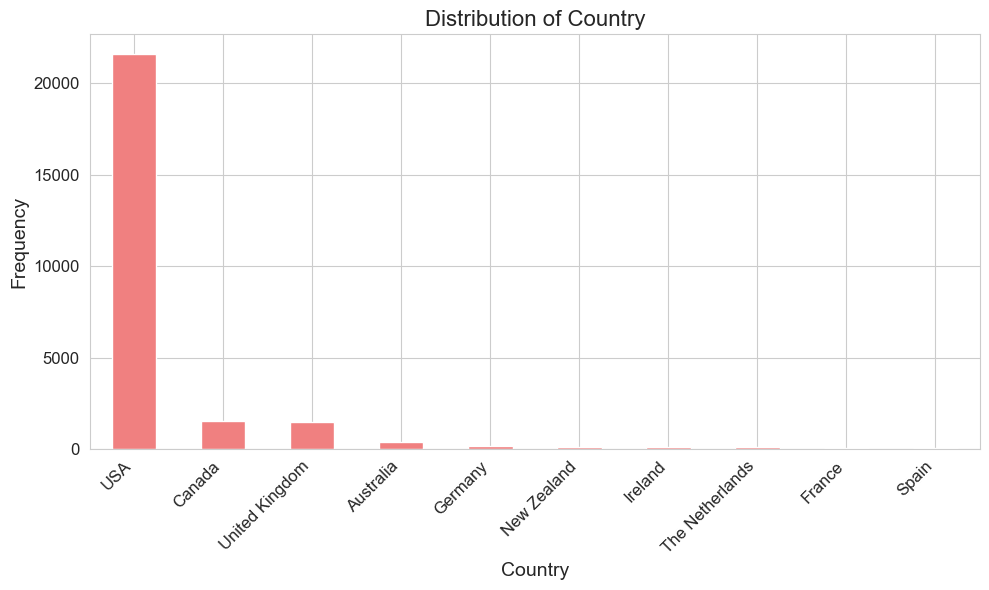

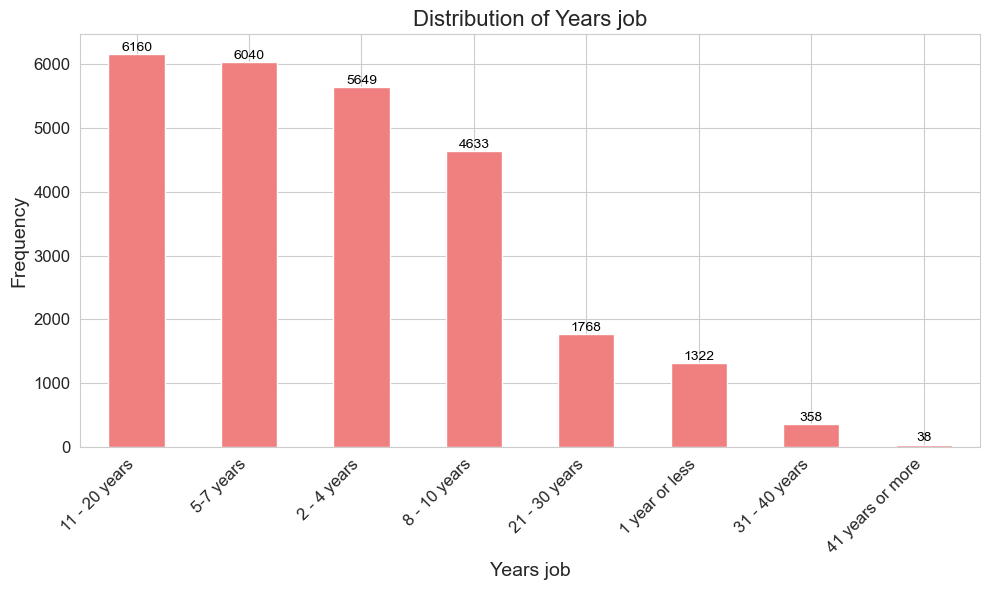

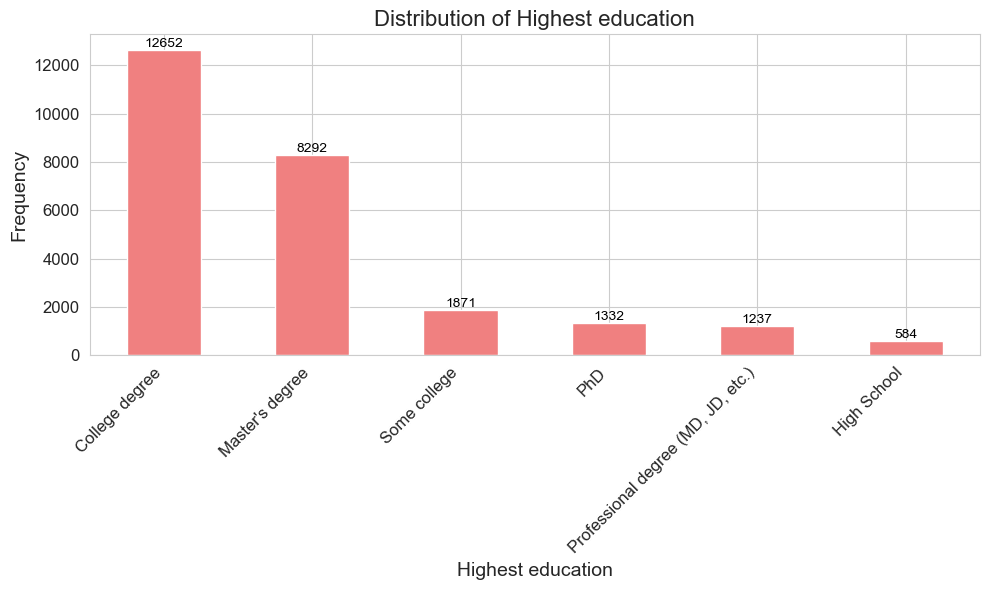

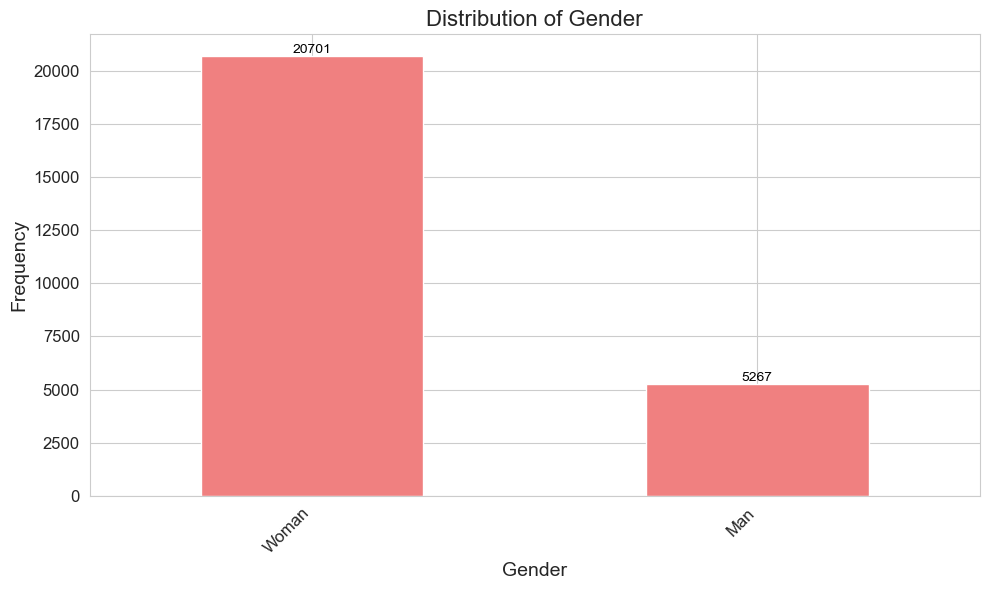

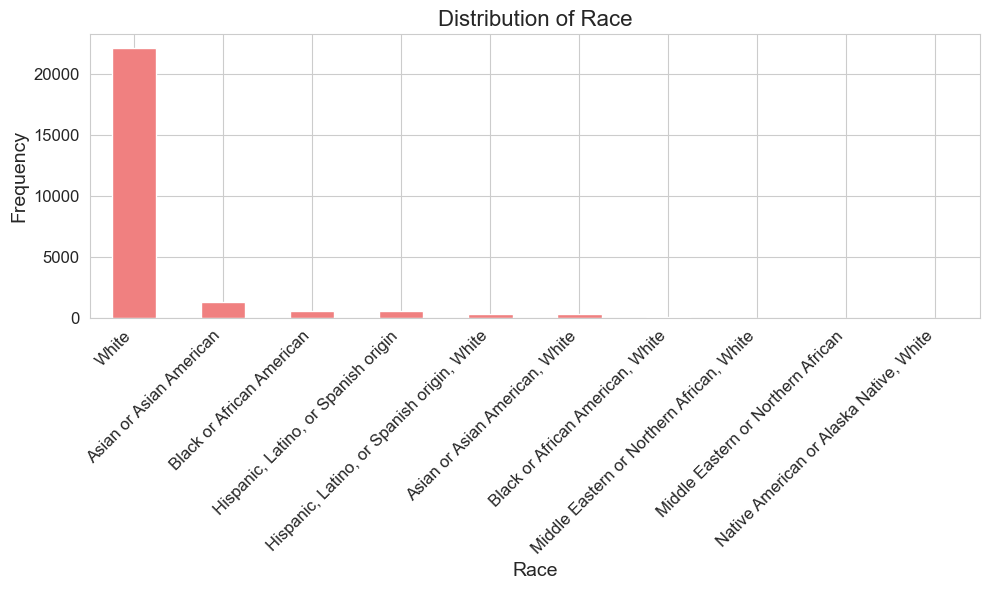

Numerical Statistics:
         Unnamed: 0        Salary
count  25968.000000  2.596800e+04
mean   14111.841805  9.689263e+04
std     8036.622834  8.690066e+04
min       17.000000  5.405040e+00
25%     7159.750000  5.532414e+04
50%    14147.500000  7.800000e+04
75%    21070.250000  1.144000e+05
max    28038.000000  5.004044e+06

Value counts for Age:
Age
25-34         11618
35-44          9261
45-54          3004
18-24          1059
55-64           930
65 or over       89
under 18          7
Name: count, dtype: int64

Value counts for Industry:
Industry
COMPUTING OR TECH                       4318
EDUCATION (HIGHER EDUCATION)            2284
NONPROFITS                              2245
OTHERS                                  2145
GOVERNMENT AND PUBLIC ADMINISTRATION    1767
HEALTH CARE                             1752
ACCOUNTING, BANKING & FINANCE           1689
ENGINEERING OR MANUFACTURING            1581
MARKETING, ADVERTISING & PR             1070
LAW                                  

In [22]:
sns.set_style("whitegrid")

numerical_cols = df.select_dtypes(include=['number']).columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

# numerical columns
for col in numerical_cols:
    if col != 'Unnamed: 0':
        plt.figure(figsize=(8, 6))
        ax = df[col].hist(color='skyblue', edgecolor='black', bins=20)
        plt.title(f'Histogram of {col}', fontsize=16)
        plt.xlabel(col, fontsize=14)
        plt.ylabel('Frequency', fontsize=14)
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
        
        for p in ax.patches:
            ax.annotate(f"{int(p.get_height())}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

        plt.tight_layout()
        plt.show()

# categorical columns
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    if col == 'Country':  # show only top-10
        top_countries = df[col].value_counts().nlargest(10)
        top_countries.plot(kind='bar', color='lightcoral')
    elif col == 'Race':  # show only top-10
        top_race_answers = df[col].value_counts().nlargest(10)
        top_race_answers.plot(kind='bar', color='lightcoral')
    else:
        df[col].value_counts().plot(kind='bar', color='lightcoral')
    
    plt.title(f'Distribution of {col}', fontsize=16)
    plt.xlabel(col, fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.xticks(rotation=45, ha='right', fontsize=12)
    plt.yticks(fontsize=12)
    
    if col != 'Country' and col != 'Race':  
        for i, v in enumerate(df[col].value_counts()):
            plt.text(i, v + 0.2, str(v), ha='center', va='bottom', fontsize=10, color='black')
    
    plt.tight_layout()
    plt.show()

# statistics for numerical
numerical_stats = df[numerical_cols].describe()
print("Numerical Statistics:")
print(numerical_stats)

# statistics for categorical
for col in categorical_cols:
    print(f"\nValue counts for {col}:")
    if col == 'Country':  
        print(df[col].value_counts().nlargest(10))
    elif col == 'Race':  
        print(df[col].value_counts().nlargest(10))
    else:
        print(df[col].value_counts())
